# WEEK 6 - LAB EXERCISES

**Student Name:** Tran Thi Hong Phuong<br />
**Student ID:** s3623386

# Introduction

In this lab, we will need to import the following packages:

`pandas
matplotlib.pyplot
numpy
sklearn`

From the sklearn package, use the following imports:

`tree
preprocessing
metrics
model_selection`

We will be using a new package called graphviz to visualise the decision trees. It is likely that you won’t have the graphviz package available, in which case you will need to install graphviz. You can install graphviz through the Anaconda navigator interface (environment tab - search for the package python-graphviz).

If this fails, then you can install graphviz via the command line. Open a terminal or command window, then
locate the anaconda installation on your machine. On MacOS, this is:

`cd ~/anaconda3/bin`

Then run the following command to install graphviz (following the prompts):

`./conda install python-graphviz`

**IMPORTANT:** If you cant install `graphviz` don’t worry - you can still complete the lab. Graphviz is nice to be able to see the trees that are being calculated. However, once the trees become complex, visualising them isn’t practical. You can also use Orange to play around with learning and visualising the decision trees.

# Datasets

You will be looking at four data sets for this lab, three of which you have seen before:

Sailing
Zoo (animal)
Quality of red wine
Boston House pricingPreview the document (from the previous lab)

**Begin with loading these dataset and name them `sailData`, `zooData`, `wineData`, and `bostonData` respectively. For the zoo dataset, remove the unnecessary column `name`.**

In [22]:
import pandas as pd
pd.options.display.max_columns = None

sailData = pd.read_csv('sailing-custom-python.tab', delimiter='\t')
zooData = pd.read_csv('zoo-python.tab', delimiter='\t')
wineData = pd.read_csv('winequality-red.tab', delimiter='\t')
bostonData = pd.read_csv('housing.data.csv', delimiter='\s+')

In [23]:
zooData.drop(['name'], axis = 1, inplace = True)

# Simple Tree with Categorical Data: Sail Data

The sail data is simple, and can be used to practice learning a classification decision tree. **Print out 10 first records of this dataset to see what it looks like.**

In [9]:
sailData.head(10)

,Outlook,Company,Sailboat,Sail
0,rainy,big,big,yes
1,rainy,big,small,yes
2,rainy,med,big,no
3,rainy,med,small,no
4,sunny,big,big,yes
5,sunny,big,small,yes
6,sunny,med,big,yes
7,sunny,med,big,yes
8,sunny,med,small,yes
9,sunny,no,small,yes


It is worth mentioning that sklearn's classification decision tree learner doesn't work with categorical attributes. It only works with continuous numeric attributes (which might be convenient in other situations). The target class, however, must be categorical. So the categorical attributes must be converted into a suitable continuous format. Helpfully, pandas can help you do that.

**First, split the sailing data into the target class and attributes. Name the target and attributes variables as `sailDataTarget` and `sailDataAttrs` respectively.** The target is the whether the decision is to sail or not. The attributes can be the remaining columns of the dataset.

In [10]:
sailDataAttrs = sailData.drop(['Sail'], axis = 1)
sailDataTarget = sailData['Sail']

**Then, use the built-in function called 'get_dummies' of pandas to generate "numerical" versions of the categorical attributes. Apply this function to sailDataAttrs and create a new variable called sailDataAttrsExpand. Print this variable out to see what it looks like.**

In [11]:
sailDataAttrsExpand = pd.get_dummies(sailDataAttrs)
sailDataAttrsExpand

,Outlook_rainy,Outlook_sunny,Company_big,Company_med,Company_no,Sailboat_big,Sailboat_small
0,1,0,1,0,0,1,0
1,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,0,1,0
5,0,1,1,0,0,0,1
6,0,1,0,1,0,1,0
7,0,1,0,1,0,1,0
8,0,1,0,1,0,0,1
9,0,1,0,0,1,0,1


As you can see, the categories are expanded into boolean (yes/no, that is, 1/0) values that can be treated as continuous numerical values. It’s not ideal, but it will allow a correct decision tree to be learned.

The target class also needs to be pre-processed. The target will be treated by sklearn as a category, but sklearn requires that these categories are represented as integers (not strings). To convert the strings into numbers, the preprocessing.LabelEncoder class from sklearn can be used, as shown below.

In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(sailDataTarget)

class_labels = le.inverse_transform([0,1])

print(np.array(sailDataTarget))
print('Labels to normalised encoding')
print(le.transform(sailDataTarget))
print('Labels to original encoding')
print(class_labels)

['yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes']
Labels to normalised encoding
[1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1]
Labels to original encoding
['no' 'yes']


**QUESTION: Why is it necessary to convert the attributes into boolean representations, rather than just convert them into integer values? What problem would be caused by converting the attributes into integers?**

> *ANSWER: Boolean representations are for categorical values having no relations with each other, while integer values are used for ranked values*

Now a decision tree classifier can be trained over the sailing data set by:

In [14]:
from sklearn.tree import DecisionTreeClassifier

clfSail = DecisionTreeClassifier(criterion='entropy')
clfSail = clfSail.fit(sailDataAttrsExpand, sailDataTarget)

Have a look at the documentation for tree.DecisionTreeClassifier. **Here we want to specify the parameter so that entropy is used for generating the splits. Change to code above to do so.** Note that sklearn uses information gain, and there isn't a way to use gain ratio.

The DecisionTreeClassifier class is very similar to the regression classes you have been using in previous labs. Thus it has usual functions that you have been before, such

`fit` - to learn a tree that fits some training<br />
`predict` - to measure the performance of a fitted decision tree over some test data

So the classifications of the training data can be “predicted”, although obviously this won’t provide much information:

In [16]:
from sklearn.metrics import classification_report

predictions = clfSail.predict(sailDataAttrsExpand)
print(classification_report(sailDataTarget, predictions))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         8
         yes       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



Finally, grahviz can draw the decision tree:

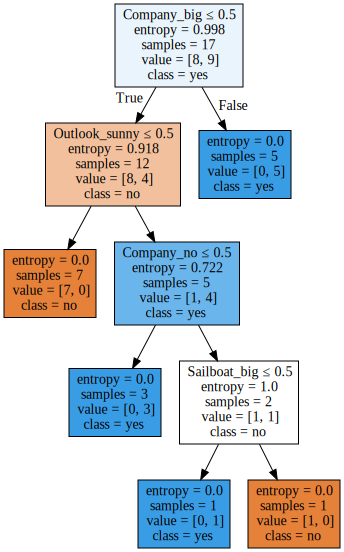

In [18]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clfSail, out_file=None, feature_names=sailDataAttrsExpand.columns,
                           class_names=class_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data)
graph

You might notice a few things about the classification decision

- The splits are not done by category but by a numerical split point (typically 0.5).
- The tree is binary, because split points are used
- However, the tree is essentially the same as the one shown in the lecture and tutorial.

# Categorical Data: Zoo Data

For your own exercise, train a classification decision tree over the zoo data set. To help, i’ve generated the correct “numeric” categories for the target class. You will need to generate `zooDataTarget` and `zooDataAttrs`.

In [19]:
zooData.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,4.0,No,No,Yes,mammal
1,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,4.0,Yes,No,Yes,mammal
2,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,0.0,Yes,No,No,fish
3,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,4.0,No,No,Yes,mammal
4,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,4.0,Yes,No,Yes,mammal


In [20]:
zooDataAttrs = zooData.drop(['type'], axis = 1)
zooDataTarget = zooData['type']

In [24]:
zooDataAttrsExpand = pd.get_dummies(zooDataAttrs)
zooDataAttrsExpand.head()

,legs,hair_No,hair_Yes,feathers_No,feathers_Yes,eggs_No,eggs_Yes,milk_No,milk_Yes,airborne_No,airborne_Yes,aquatic_No,aquatic_Yes,predator_No,predator_Yes,toothed_No,toothed_Yes,backbone_No,backbone_Yes,breathes_No,breathes_Yes,venomous_No,venomous_Yes,fins_No,fins_Yes,tail_No,tail_Yes,domestic_No,domestic_Yes,catsize_No,catsize_Yes
0,4.0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1
1,4.0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1
2,0.0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0
3,4.0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1
4,4.0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1


In [27]:
le.fit(zooDataTarget)
zooDataTargetTransformed = le.transform(zooDataTarget)

In [29]:
clfZoo = DecisionTreeClassifier(criterion='entropy')
clfZoo.fit(zooDataAttrsExpand, zooDataTargetTransformed)

predictions = clfZoo.predict(zooDataAttrsExpand)
print(classification_report(zooDataTargetTransformed, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



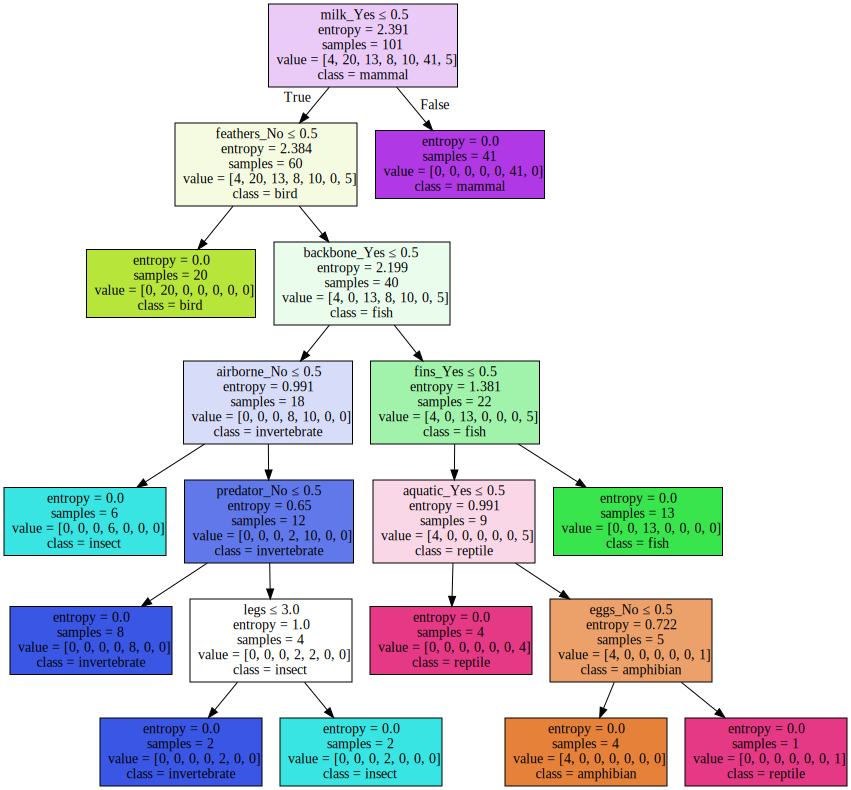

In [33]:
dot_data = export_graphviz(clfZoo, out_file=None, feature_names=zooDataAttrsExpand.columns,
                           class_names=le.classes_, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Numerical Data: Wine Quality

The classification task of the wine quality data set is to predict the quality of red-wines using a variety of properties about the wine, which are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.

The quality target is a category on a scale between 0 and 10.

**To train a decision tree for the wine quality data set, create the target class and attributes.**

In [34]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [35]:
wineDataAttrs = wineData.drop(['quality'], axis = 1)
wineDataTarget = wineData['quality']

**Then build and view a classification decision tree** by (I have provided the class names):

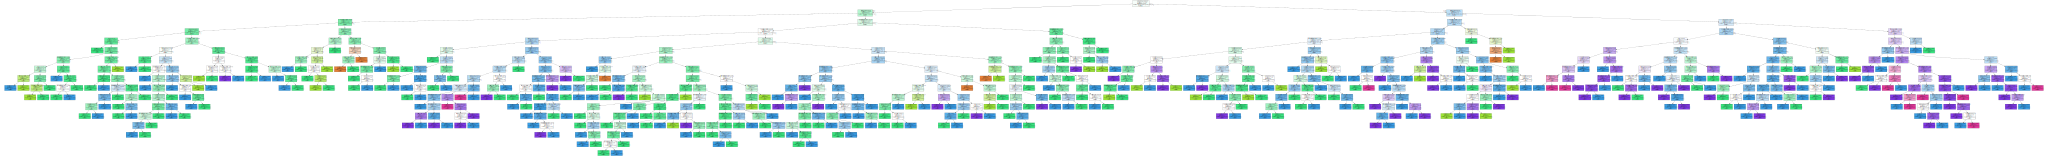

In [79]:
clfWine = DecisionTreeClassifier(criterion='entropy')
clfWine.fit(wineDataAttrs, wineDataTarget)

dot_data = export_graphviz(clfWine, out_file=None, feature_names=wineDataAttrs.columns,
                           class_names=[str(c) for c in range(0, 11)], filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data)
graph

Note how additional pre-processing is not required as the classification decision trees in sklearn works out of the box if all of the attributes have continuous numeric values. However, this tree is hugely complex. The following tells us the total number of nodes in the tree:

In [80]:
clfWine.tree_.node_count

739

Mostly likely this tree is over-fitted, so we it will need to be pruned.

# Pruning

You are going to investigate using sklearn for pre-pruning. A note about post-pruning is given below.

## Pre-pruning

Pre-pruning is done by settings parameters when creating the `DecisionTreeClassifier` class. For example, the `max_depth` parameter configures the maximum depth of the decision tree. **Below limits the decision tree to a depth of 2.**

In [39]:
clfWine = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clfWine = clfWine.fit(wineDataAttrs, wineDataTarget)
print("node count:", clfWine.tree_.node_count)

node count: 7


View this revised decision tree:

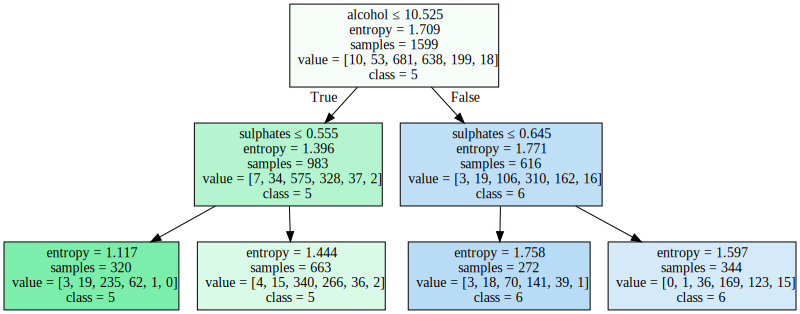

In [42]:
dotDataWine = export_graphviz(clfWine, out_file=None, feature_names=wineDataAttrs.columns,
                                   class_names=['3','4','5','6','7','8'], filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dotDataWine)
graph

Your task is to find the maximum tree depth produces the best performance. **Begin by constructing training and validation data sets:**

In [58]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(np.array(wineDataAttrs), np.array(wineDataTarget), test_size=0.2, random_state=191)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


**Next, train a new classification decision tree:**

In [55]:
clfWine2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clfWine2.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Then, look at metrics such as the accuracy and classification report.**

In [57]:
from sklearn.metrics import accuracy_score

predictions = clfWine2.predict(testX)

print('Accuracy:', accuracy_score(predictions, testY))
print('Classification Report:')
print(classification_report(predictions, testY))

Accuracy: 0.59375
Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         1
         5.0       0.86      0.63      0.73       197
         6.0       0.49      0.53      0.51       111
         7.0       0.16      0.55      0.24        11
         8.0       0.00      0.00      0.00         0

   micro avg       0.59      0.59      0.59       320
   macro avg       0.25      0.29      0.25       320
weighted avg       0.71      0.59      0.64       320



C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Now, your task is to write a function to find the best setting for the maximum depth of tree to produce the best accuracy.**

In [85]:
accuracy = pd.DataFrame(columns=['accuracy'])

for depth in range(1, 100, 5):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(trainX, trainY)
    preds = clf.predict(testX)
    accuracy.loc[depth] = accuracy_score(preds, testY)

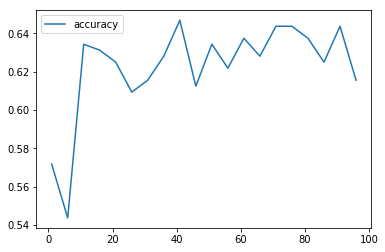

In [86]:
accuracy.plot()

In [87]:
accuracy.sort_values(['accuracy'], ascending=False)

,accuracy
41,0.646875
71,0.643750
91,0.643750
76,0.643750
81,0.637500
61,0.637500
51,0.634375
11,0.634375
16,0.631250
36,0.628125


There are other pre-pruning configuration parameters, including:

- `min_samples_split` - sets the minimum number of training examples required at a node before a split is attempted
- `min_samples_leaf` - sets the minimum number of training examples required in a leaf node after a split has been generated.

**EXERCISE: Improve on the accuracy of learned decision tree by adjusting the above parameters**

In [93]:
clfWinePrune = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, min_samples_leaf=10)
clfWinePrune.fit(trainX, trainY)

preds = clfWinePrune.predict(testX)
print('Accuracy:', accuracy_score(preds, testY))

Accuracy: 0.615625


## Post-pruning

sklearn does not support post-pruning, such as reduced error pruning. It is (technically) possible to do, as sklearn provides an interface to traversing the structure of the decision tree that is has computed. However, we won’t be covering how to go about it. If you are interested, this page will get you started: http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

# Regression Decision Tree

Regression decision tree can also be trained. These are decision trees where the leaf node is a regression function. You will investigate learning regression trees using the Boston housing data set. The below code snippet will help get you started. Note that it does not make sense to use entropy for generating splits, so the default method from sklearn will be used. Also note that the `DecisionTreeRegressor` class uses similar pre-pruning parameters.

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

bostonDataTarget = bostonData['MEDV']
bostonDataAttrs = bostonData.drop(columns='MEDV')

trainX, testX, trainY, testY = train_test_split(np.array(bostonDataAttrs), np.array(bostonDataTarget), test_size=0.2, random_state = 191)

clfBoston = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
clfBoston.fit(trainX, trainY)

predictions = clfBoston.predict(testX)
mean_squared_error(testY, predictions)

16.36606276384293